# DEEP NEURAL NETWORK: APPLICATION

## 1:Packages

In [18]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2: Datasets

In [19]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images.

y= 1. It's a cat picture


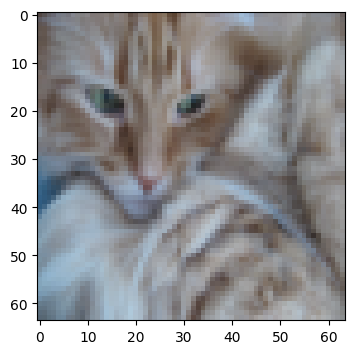

In [20]:
#Example of a picture
index=2
plt.imshow(train_x_orig[index])
print("y= " + str(train_y[0,index])+ ". It's a "+classes[train_y[0,index]].decode("utf-8") +" picture")

In [21]:
#Explore the dataset
m_train=train_x_orig.shape[0]
num_px=train_x_orig.shape[1]
m_test=test_x_orig.shape[0]

print("Number of training examples: "+ str(m_train))
print("Number of testing examples: "+ str(m_test))
print("Each image is of size: (" +str(num_px)+","+str(num_px)+", 3)")
print("train_x_orig shape "+ str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64,64, 3)
train_x_orig shape (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, we reshape and standardize the images before feeding them to the network.

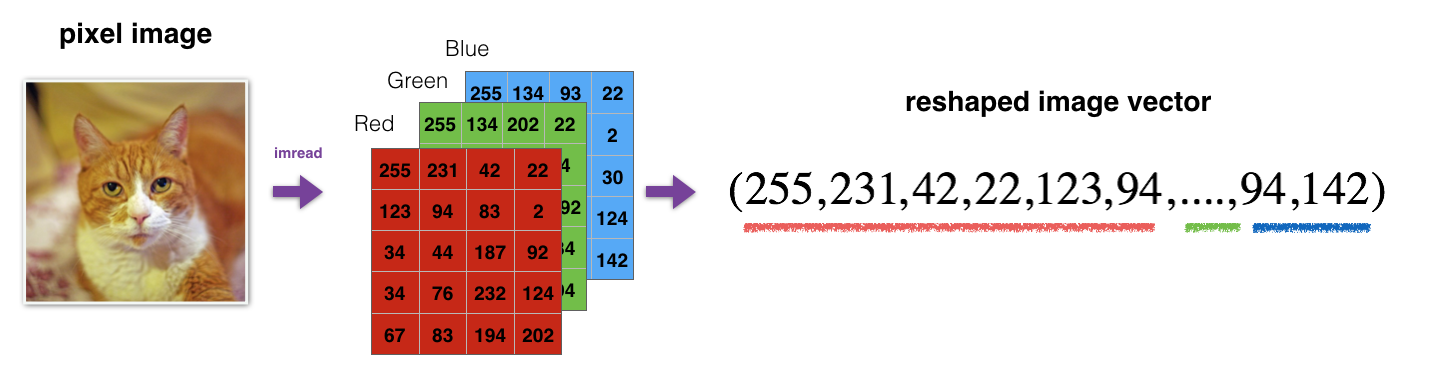

In [22]:
from IPython.display import Image
image_path='E:\DeepLearning\C1_NeuralNetworkandDeepLearning\Week4\DeepNeuralNetworkApplication\images\imvector.png'
Image(filename=image_path)

In [23]:
#Reshape the training and test examples
#Each image is of size (64,64,3) so when we analyze there will be 64*64*3=12288
train_x_flatten=train_x_orig.reshape(train_x_orig.shape[0],-1).T #shape now be (12288,209)
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T

#Standardize data so that it have value between 0 and 1
train_x=train_x_flatten/255
test_x=test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## 3-Architect of your model

Now you are familiar with the dataset, let's build a deep neural network to distinguish cat image and non cat image.

We will build 2 different models:
1. A 2 layer neural network
2. An L-layer deep neural network

### 3.1- 2-layer neural network

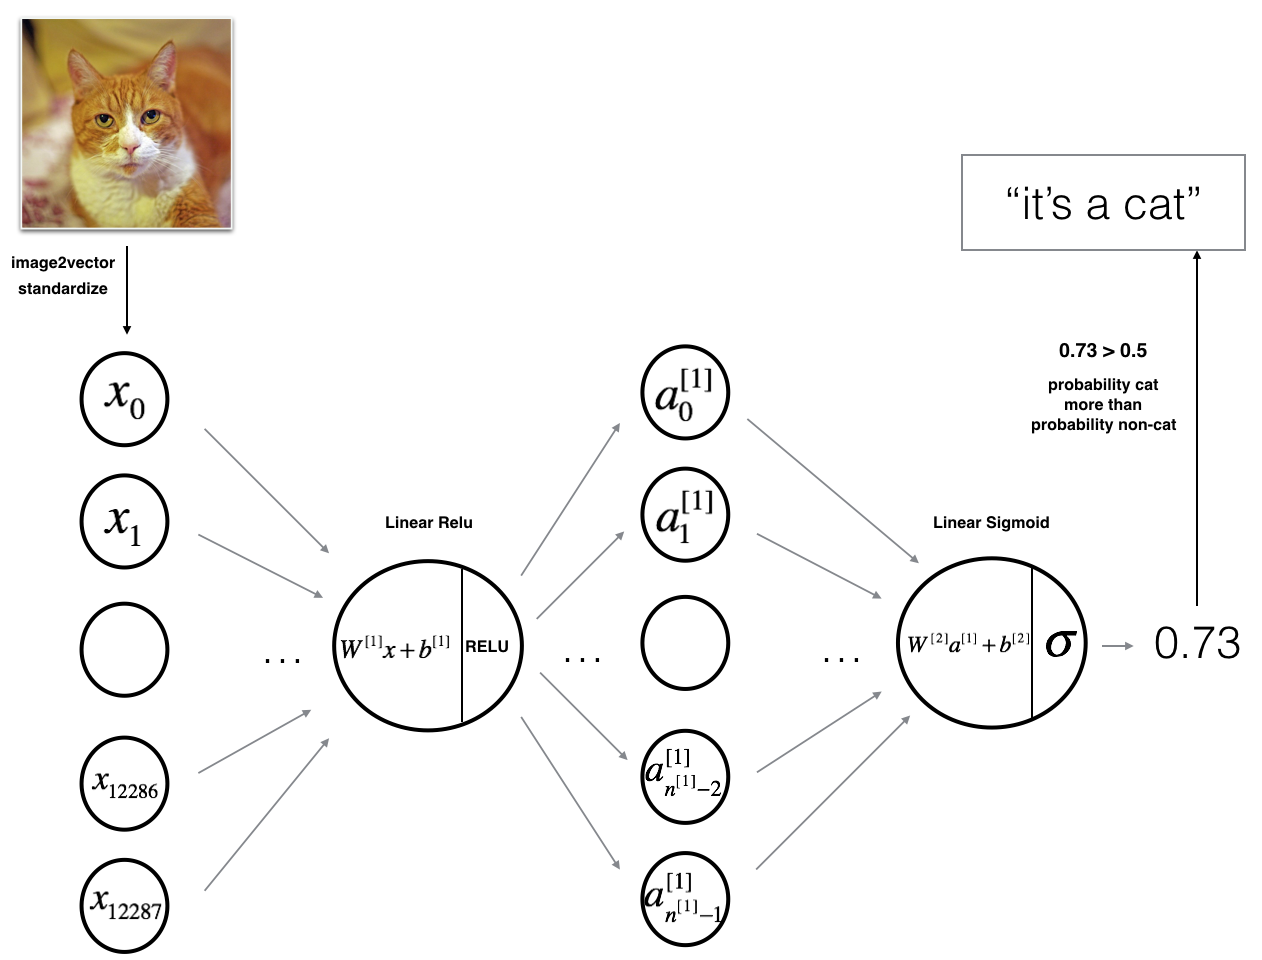

In [24]:
from IPython.display import Image
image_path='E:\\DeepLearning\\C1_NeuralNetworkandDeepLearning\\Week4\\DeepNeuralNetworkApplication\\images\\2layerNN_kiank.png'
Image(filename=image_path)

The model can be summmarized as: INPUT> LINEAR>RELU>LINEAR>SIGMOID>OUTPUT.
1. The input is a (64,64,3) image which is flattented to a vector of size (12288,1).
2. The correspoding vector: [x0,x1,....,x12287]^T is then multiplied by the weight matrix W[1] of size (n[1],12288).
3. You then add a bias term and take its relu to get the following vector
4. You the repeat the same process.
5. You multiply the resulting vector by W[2] and add your bias
6. Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.

### 3.2_ L-layer deep neural network

It's hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation.

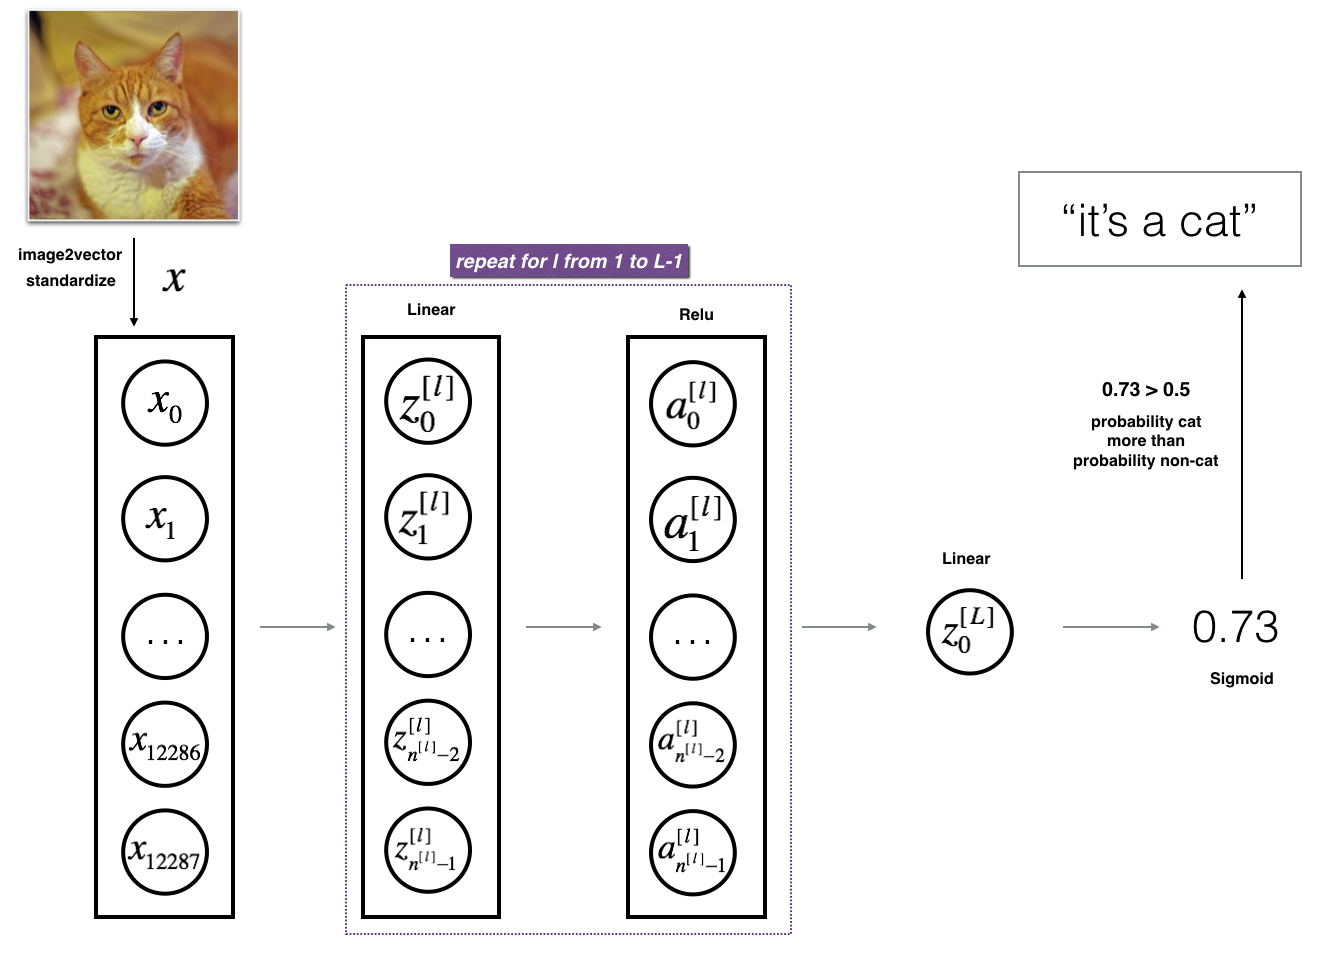

In [25]:
from IPython.display import Image
image_path='E:\DeepLearning\C1_NeuralNetworkandDeepLearning\Week4\DeepNeuralNetworkApplication\images\LlayerNN_kiank.png'
Image(filename=image_path)

        Figure : L-Layer neural network

The model can be summarized as: ***[LINEAR->RELU]*(L-1)>LINEAR>SIGMOID.
1. The input is a (64,64,3) image which is flattened to a vector of size (12288,1)
2. The corresponding vector: [x0,x1,...,x12287]^T is then multiplied by the weight matrix W[1] and then you add the intercept b[1]. The result is called the linear unit.
3. Next, you take the relu of the linear unit. This process could be repeated several times for each (W[l],b[l]) depending on the model architecture.
4. Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 -General methodology

1. Initialize parameters/define hyperparameters
2. Loop for num_iterations: 
    * Forward propagation
    * Compute cost function
    * Backward propagation
    * Update parameters(using parameters and grads from backprop)
3. Use trained parameters to predict


In [26]:
"""The function we need and their input are:
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters"""

'The function we need and their input are:\ndef initialize_parameters(n_x, n_h, n_y):\n    ...\n    return parameters \ndef linear_activation_forward(A_prev, W, b, activation):\n    ...\n    return A, cache\ndef compute_cost(AL, Y):\n    ...\n    return cost\ndef linear_activation_backward(dA, cache, activation):\n    ...\n    return dA_prev, dW, db\ndef update_parameters(parameters, grads, learning_rate):\n    ...\n    return parameters'

In [27]:
#CONSTANT DEFINING THE MODEL
n_x=12288
n_h=7
n_y=1
layer_dims=(n_x,n_h,n_y)

In [28]:
#GRADED FUNCTION: two layer model
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
    """
    Implement a two layer neural network: LINEAR>RELU>LINEAR>SIGMOID
    Arguments:
    X: input data, of shape (n_x, number of examples)
    Y: -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layer_dims(dimension of layer (n_x,n_h,n_y))
    print_cost: If set to True, this will print the cost every 100 iterations

    Returns:
    parameters: a dictionary containing W1,b1,W2,b2
     """
    
    np.random.seed(1)
    grads={}
    costs=[]    #to keep track of the cost
    m=X.shape[1] #number of examples
    (n_x,n_h,n_y)=layers_dims

    #Implement parameters dictionary, by calling one of the function you'd previusly implemented
    parameters=initialize_parameters(n_x,n_h,n_y)

    #Get W1,b1,W2,b2 from the dictionary
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]

    #Loop-gradient descent
    for i in range(0,num_iterations):
        A1, cache1=linear_activation_forward(X,W1,b1,activation="relu")
        A2,cache2=linear_activation_forward(A1,W2,b2,activation="sigmoid")

    #Compute cost
    cost=compute_cost(A2,Y)

    #Initializing backward propagation
    dA2=-(np.divide(Y,A2)-np.divide(1-Y,1-A2))

    #Backward propagation
    dA1,dW2,db2=linear_activation_backward(dA2,cache2,activation="sigmoid")
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")

    # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2

    # Update parameters.
        
    parameters = update_parameters(parameters, grads, learning_rate)

    # Retrieve W1, b1, W2, b2 from parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Print the cost every 100 training example
    if print_cost and i % 100 == 0:
        print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if print_cost and i % 100 == 0:
        costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

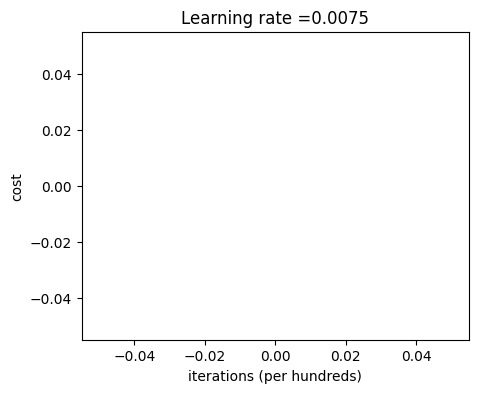

In [29]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [30]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.5741626794258372


In [31]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.34


## 5_L-layer model network


In [49]:
#CONSTANTS
layers_dims=[12288,20,5,5,1]  #4-layer model


In [51]:
#GRADED_FUNCTION: L_layer_model
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.680634
Cost after iteration 100: 0.595895
Cost after iteration 200: 0.538595
Cost after iteration 300: 0.482613
Cost after iteration 400: 0.441000
Cost after iteration 500: 0.377324
Cost after iteration 600: 0.343560
Cost after iteration 700: 0.296153
Cost after iteration 800: 0.260748
Cost after iteration 900: 0.227533
Cost after iteration 1000: 0.224217
Cost after iteration 1100: 0.192578
Cost after iteration 1200: 0.171693
Cost after iteration 1300: 0.167925
Cost after iteration 1400: 0.175123
Cost after iteration 1500: 0.137782
Cost after iteration 1600: 0.126384
Cost after iteration 1700: 0.124609
Cost after iteration 1800: 0.113737
Cost after iteration 1900: 0.104855
Cost after iteration 2000: 0.099180
Cost after iteration 2100: 0.102488
Cost after iteration 2200: 0.090002
Cost after iteration 2300: 0.085169
Cost after iteration 2400: 0.081199


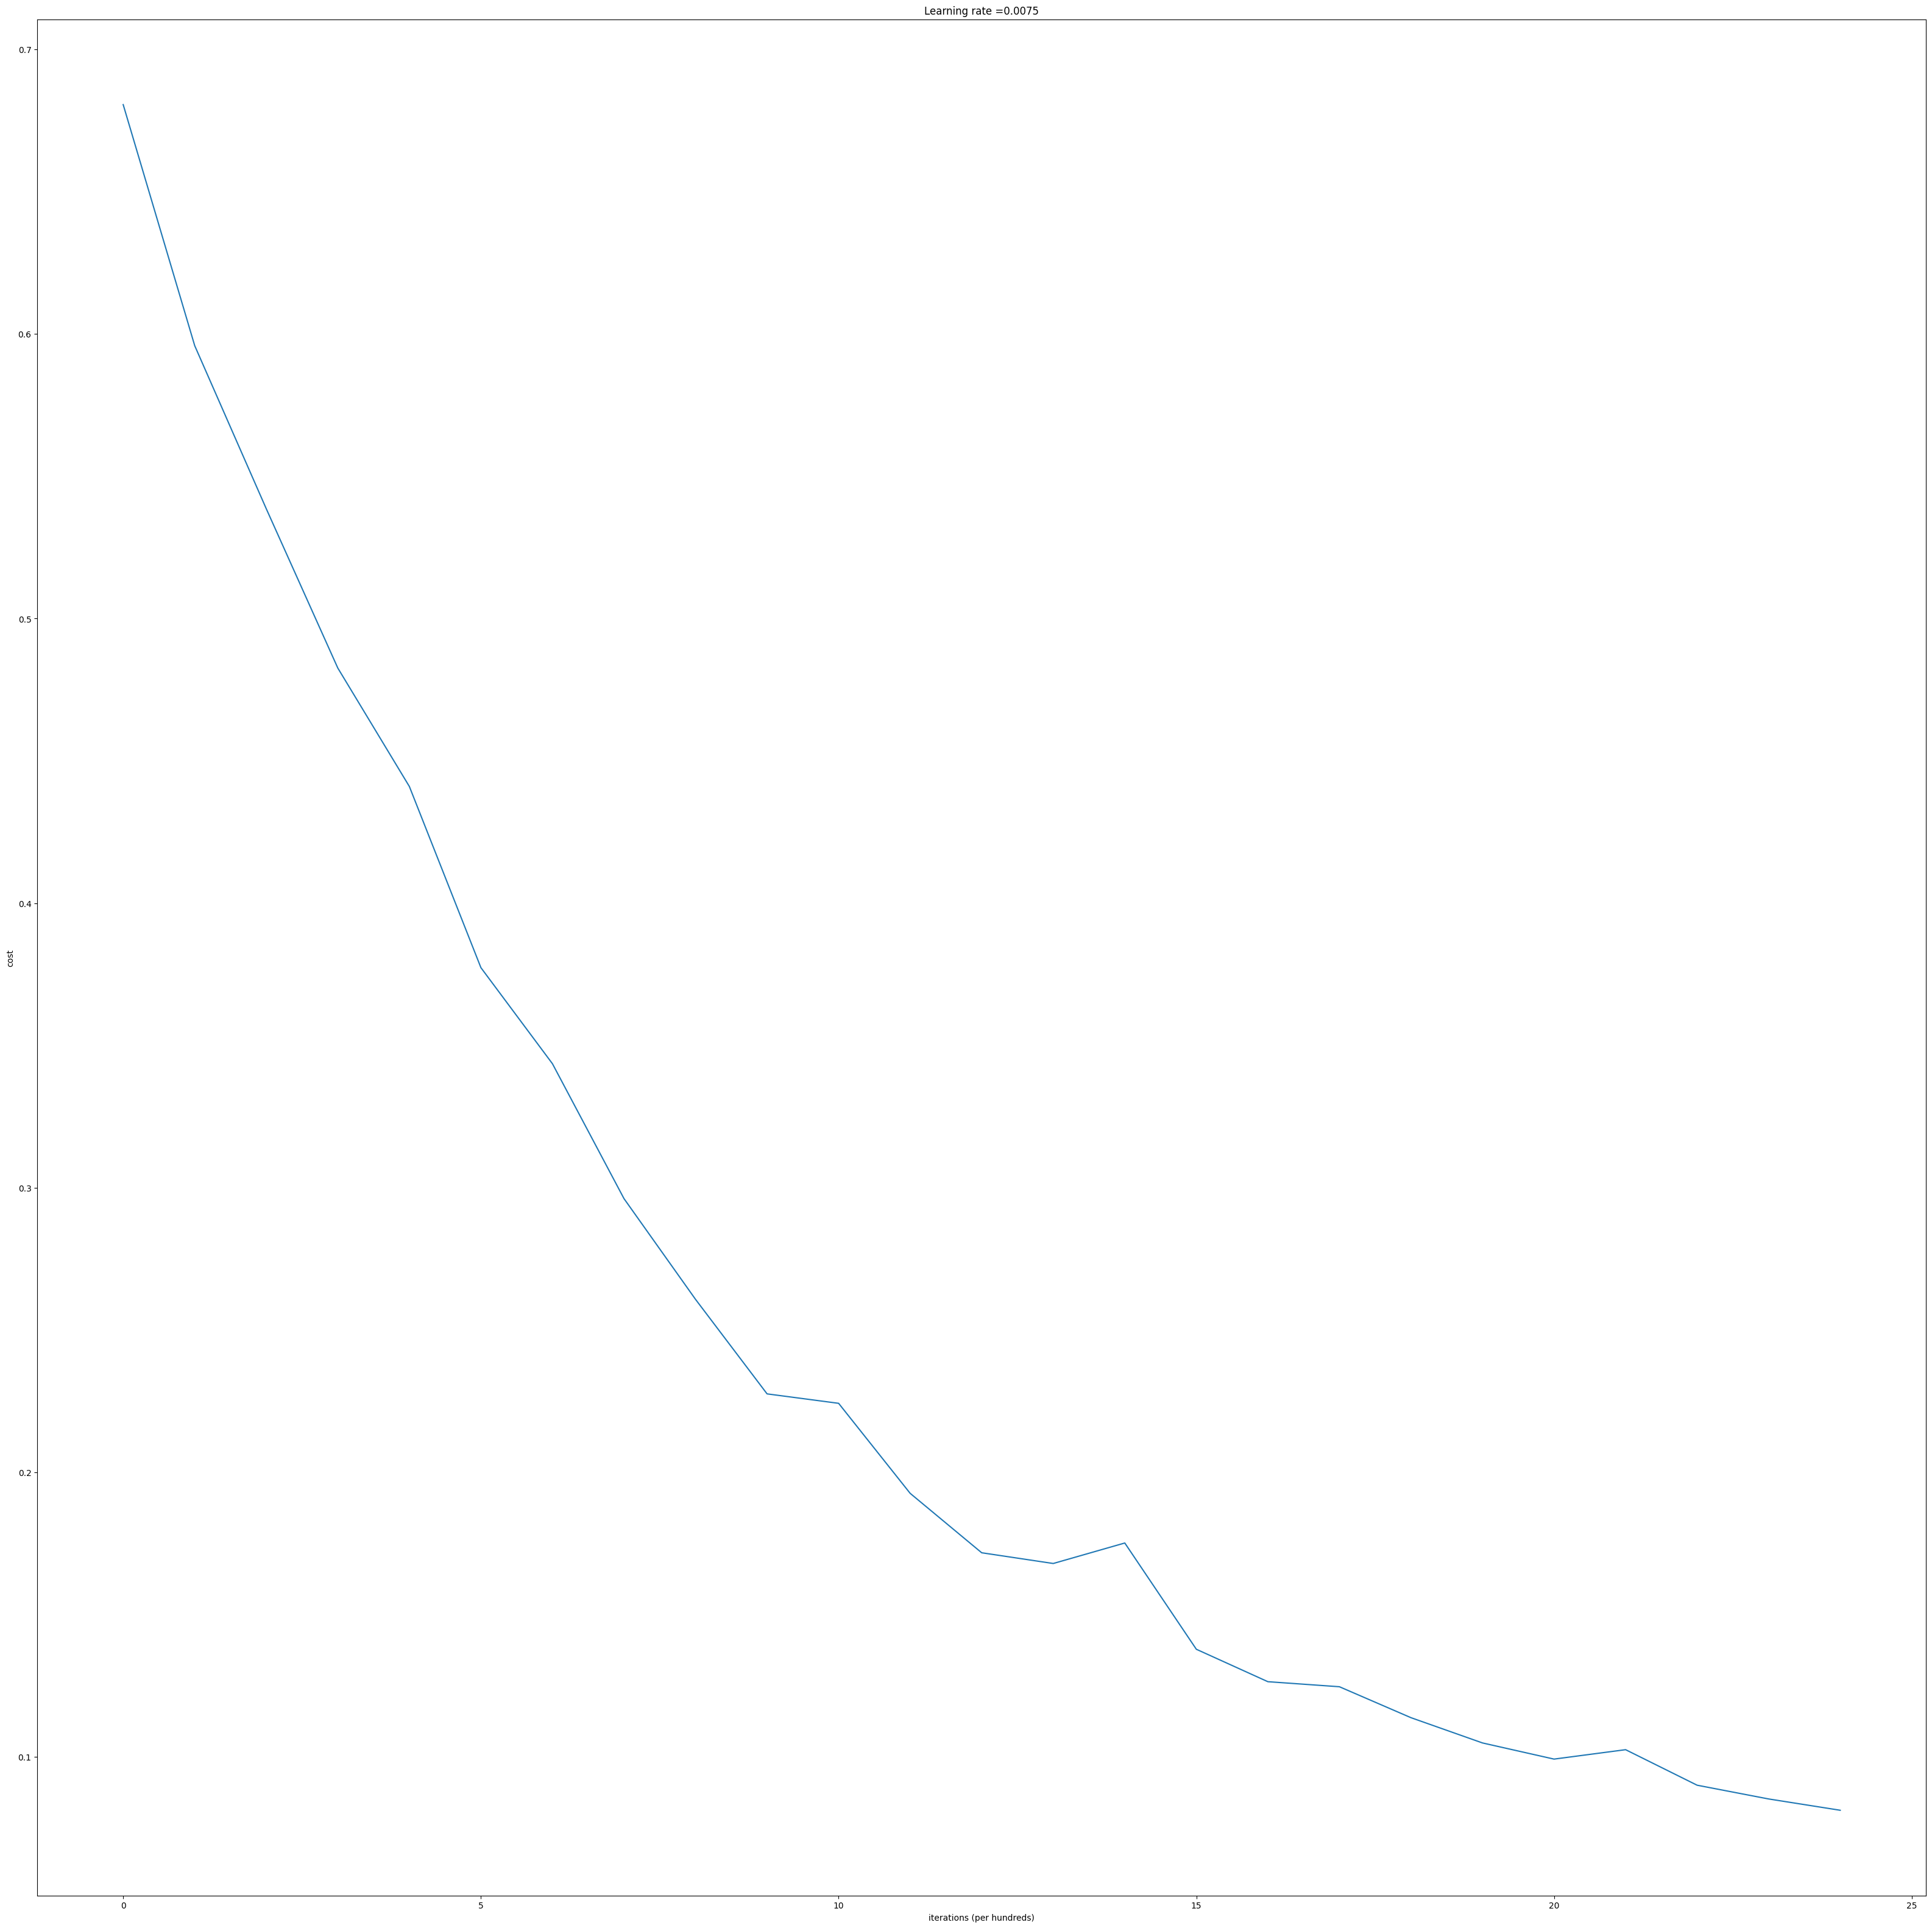

In [52]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [54]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [55]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.6400000000000001


## 6-Result Analysis

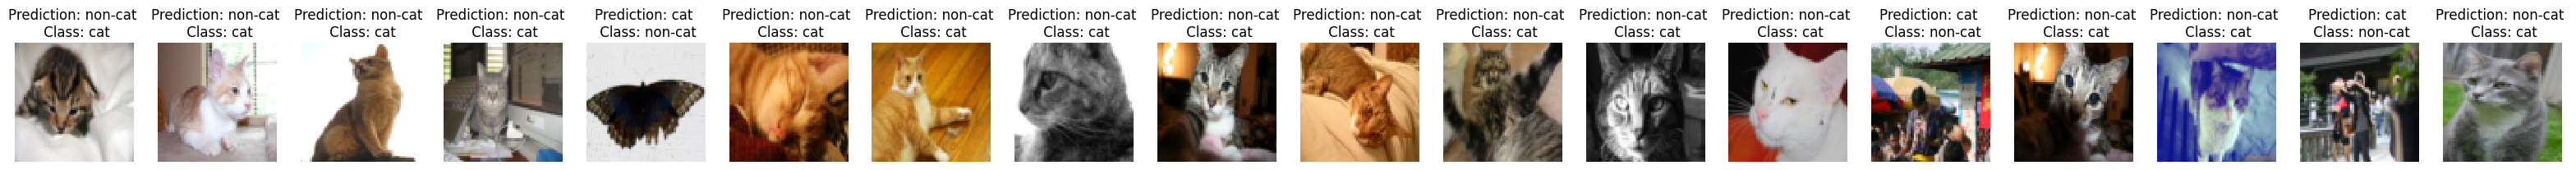

In [56]:

print_mislabeled_images(classes, test_x, test_y, pred_test)

## 7: Test with your own image

C:\Users\MinhHoang\AppData\Local\Temp\ipykernel_13236\313737768.py:2: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  fileImage=Image.open("E:\DeepLearning\C1_NeuralNetworkandDeepLearning\Week4\DeepNeuralNetworkApplication\images\imvector.png").convert("RGB").resize([num_px,num_px],Image.LANCZOS)


Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


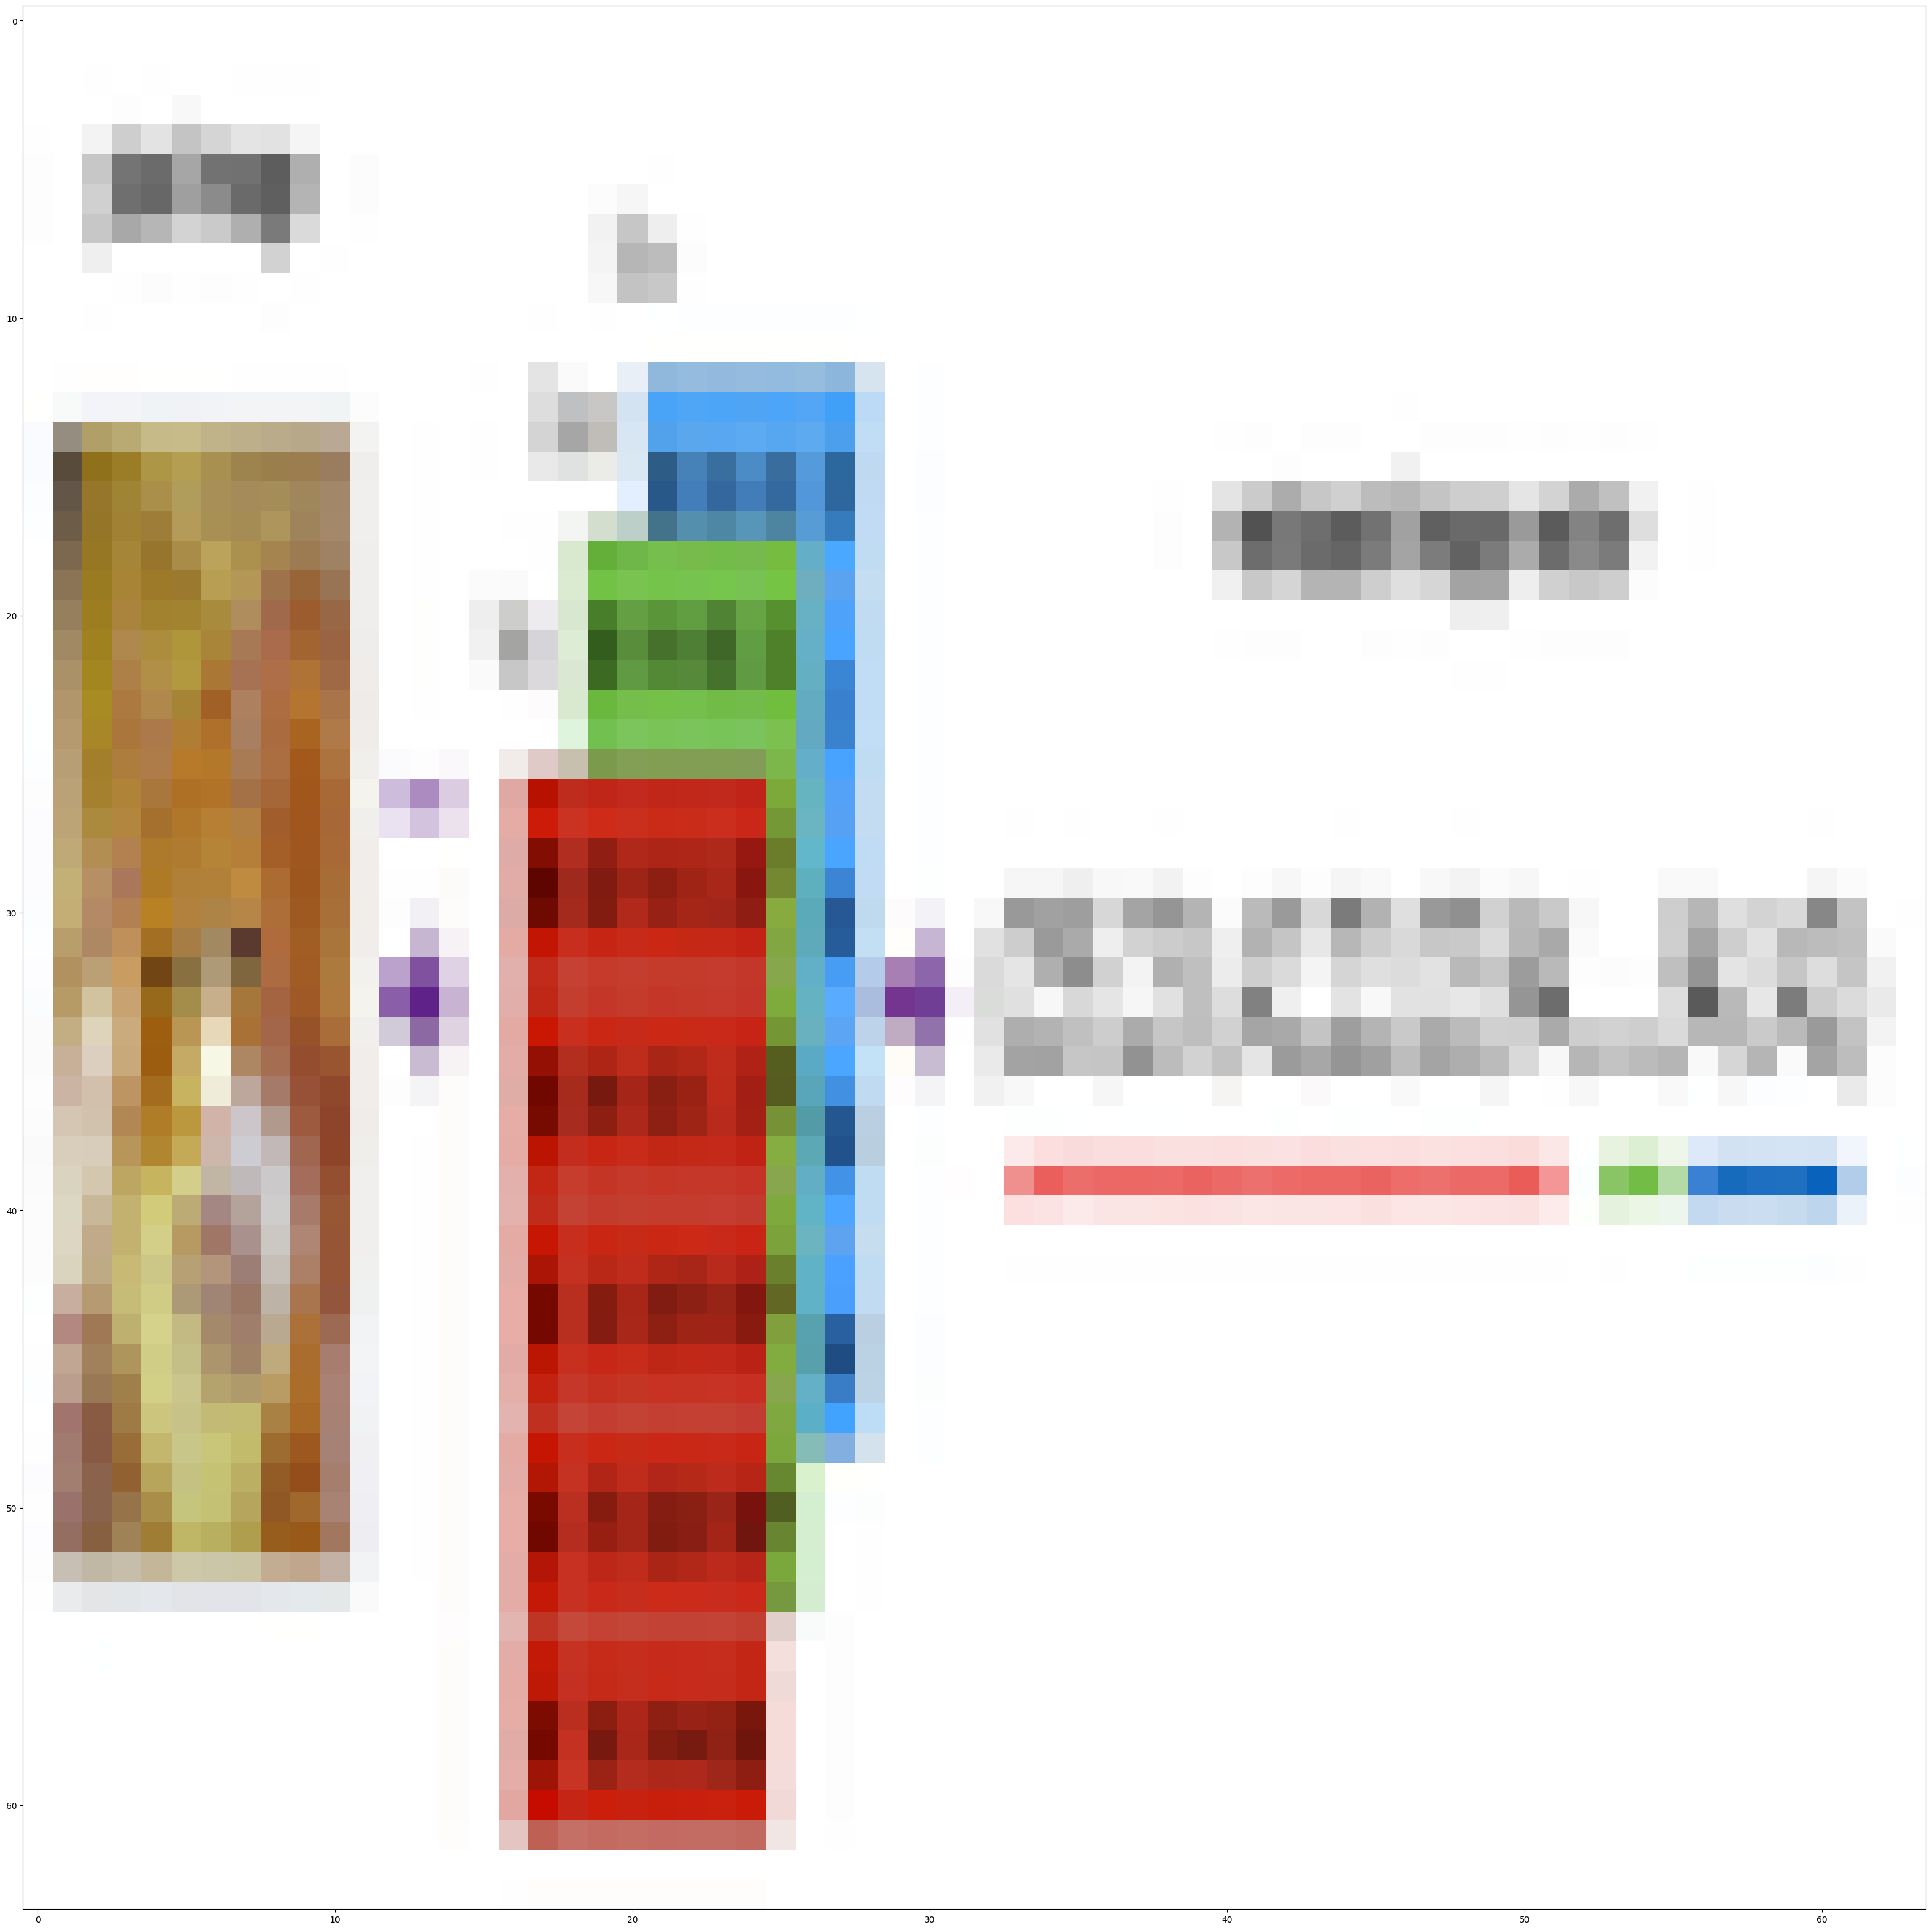

In [57]:
from PIL import Image
fileImage=Image.open("E:\DeepLearning\C1_NeuralNetworkandDeepLearning\Week4\DeepNeuralNetworkApplication\images\imvector.png").convert("RGB").resize([num_px,num_px],Image.LANCZOS)
my_label_y=[1]

image=np.array(fileImage)
my_image=image.reshape(num_px*num_px*3,1)
my_image=my_image/255
my_predicted_image = predict(my_image, my_label_y, parameters)
plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")


#### References:

In [40]:
import pickle
my_content = [train_x_orig, train_y, test_x_orig, test_y, classes]

In [41]:
# Saving variables in an array
with open("trainingDataset.pickle",'wb') as fileToBeWritten:
# For compatibility we use open(filename, 'wb') for non-text files and open(filename, 'w') for text files
    pickle.dump(my_content,fileToBeWritten)